# Training the Model

In [ ]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#mnist - dataset of handwritten numbers

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

print('Number of images in x_train : ', x_train.shape[0])
print('Number of images in x_test : ', x_test.shape[0])

Number of images in x_train :  60000
Number of images in x_test :  10000


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1939 - accuracy: 0.9405 - val_loss: 0.0490 - val_accuracy: 0.9836
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0786 - accuracy: 0.9767 - val_loss: 0.0390 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0373 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.0313 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0284 - val_accurac

# Evalution and Accuracy

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9923


[0.029469536617398262, 0.9922999739646912]

In [ ]:
model.save('mnist.h5')

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
model = load_model('mnist.h5')

In [ ]:
df = pd.read_csv('test.csv').values

In [ ]:
import numpy as np

data = np.array(df)

images = data.reshape(-1, 28, 28, 1) / 255.0

batch_size = 128
num_samples = images.shape[0]
predictions = []

for start in range(0, num_samples, batch_size):
    end = min(start + batch_size, num_samples)
    batch_images = images[start:end]
    batch_predictions = model.predict(batch_images)
    predictions.extend(np.argmax(batch_predictions, axis=1))

predictions = np.array(predictions).astype(str)

print(predictions)

3/3 [==============================] - 0s 3ms/step
['2' '0' '9' ... '3' '9' '2']


In [ ]:
submission_df = pd.DataFrame({
    'ImageId': np.arange(1, len(predictions) + 1),
    'Label': predictions
})

submission_df.to_csv('sample_submissions.csv', index=False)

# Testing the model

In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('test.csv')

# Assuming the CSV has columns for each pixel, with one row per image
# If your CSV is in a different format, you might need to adjust this step
# Example: each row is an image and each column is a pixel value
data = df.values


In [ ]:
# Select a specific row (image) to test
image_index = 0  # Change this to test different rows
image_data = data[image_index].astype(np.uint8)  # Convert to uint8 type if needed
image = np.reshape(image_data, (28, 28))  # Assuming a 28x28 image


In [ ]:
# Save the image as a PNG file
image_path = 'Test_image.png'
cv.imwrite(image_path, image)


True

1/1 [==============================] - 0s 193ms/step


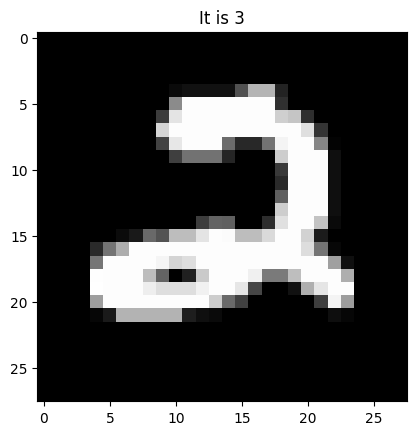

In [ ]:
import tensorflow as tf

def prediction(image_path):
    # Load the image
    frame = cv.imread(image_path)
    im = cv.imread(image_path, 0)  # Load as grayscale

    # Check if the image was loaded correctly
    if im is None or frame is None:
        print("Error: Image not found or unable to load.")
        return

    # Resize the image
    im = cv.resize(im, (28, 28))

    # Normalize and reshape the image
    im = im / 255.0
    im = 1.0 - im
    im = np.reshape(im, (1, 28, 28, 1))

    # Predict the digit using the model
    title = 'It is ' + str(np.argmax(model.predict(im)))

    # Reshape the image for display
    im = np.reshape(im, (28, 28))

    # Display the original image with the prediction title
    plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Load your trained model
model = tf.keras.models.load_model('mnist.h5')

# Call the prediction function with the saved PNG path
prediction(image_path)
